In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
cleaned_df = pd.read_csv('Data/filtered_df.csv')

In [71]:
# Texas Location: 22, New York Location: 3, Massachusetts Location:52

In [72]:
US_df = cleaned_df[["Series_Complete_Yes", "Date", "Location"]].copy()

In [73]:
cleaned_df.head()

,Unnamed: 0,Date,Location,Demographic_Category,census,Not_Vaccinated,Administered_Dose1,Series_Complete_Yes
0,882360,2021-12-30,1,1,52055.0,3116.0,48939.0,42161.0
1,882361,2021-12-30,2,1,481323.0,123150.0,358173.0,262023.0
2,882362,2021-12-30,35,26,135005.0,103698.0,31307.0,20149.0
3,882363,2021-12-30,36,26,133254.0,120857.0,12397.0,6750.0
4,882364,2021-12-30,37,28,526217.0,105711.0,420506.0,358267.0


In [74]:
US_df.head()

,Series_Complete_Yes,Date,Location
0,42161.0,2021-12-30,1
1,262023.0,2021-12-30,2
2,20149.0,2021-12-30,35
3,6750.0,2021-12-30,36
4,358267.0,2021-12-30,37


In [75]:
US_df["Date"] = pd.to_datetime(US_df["Date"])

In [76]:
US_df.dtypes

Series_Complete_Yes           float64
Date                   datetime64[ns]
Location                        int64
dtype: object

In [77]:
US_df.set_index("Date", inplace=True)

In [87]:
Massachusetts_df = US_df[US_df["Location"] == 52]
New_York_df = US_df[US_df["Location"] == 3]
Texas_df = US_df[US_df["Location"] == 22]

In [88]:
Massachusetts_df_mean = Massachusetts_df.groupby("Date").mean()
New_York_df_mean = New_York_df.groupby("Date").mean()
Texas_df_mean = Texas_df.groupby("Date").mean()

In [64]:
US_df_mean = US_df.groupby("Date").mean()

In [65]:
US_df_mean.head()

,Series_Complete_Yes
Date,
2021-12-01,654613.047674
2021-12-02,655689.606589
2021-12-03,657013.849225
2021-12-04,658168.220930
2021-12-05,658663.517829


### Below is showing the trend of the entire US with every state weighted equaly

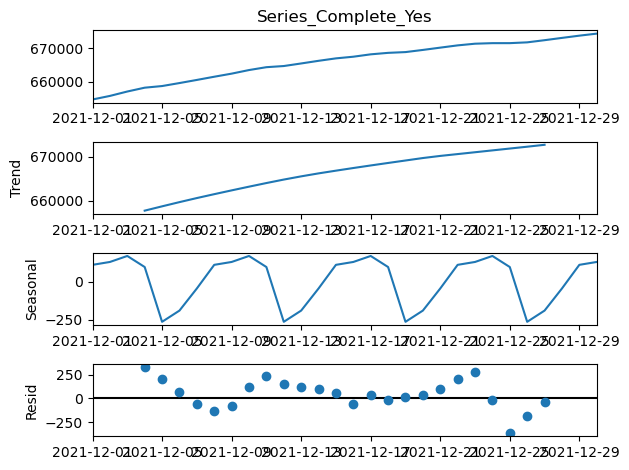

In [66]:
decomp = seasonal_decompose(US_df_mean["Series_Complete_Yes"])
decomp.plot();

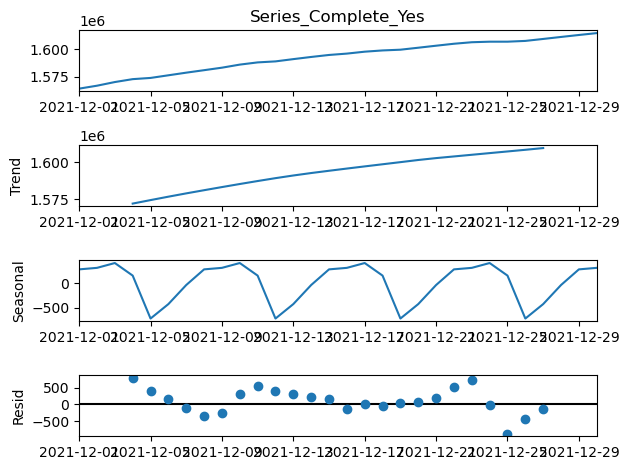

In [91]:
decomp = seasonal_decompose(Texas_df_mean["Series_Complete_Yes"])
decomp.plot();

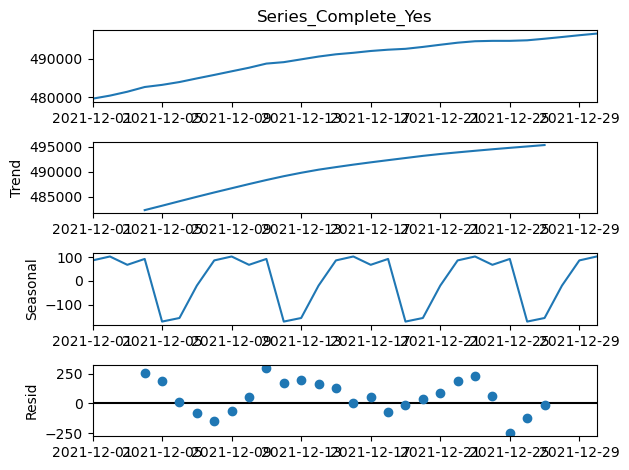

In [90]:
decomp = seasonal_decompose(Massachusetts_df_mean["Series_Complete_Yes"])
decomp.plot();

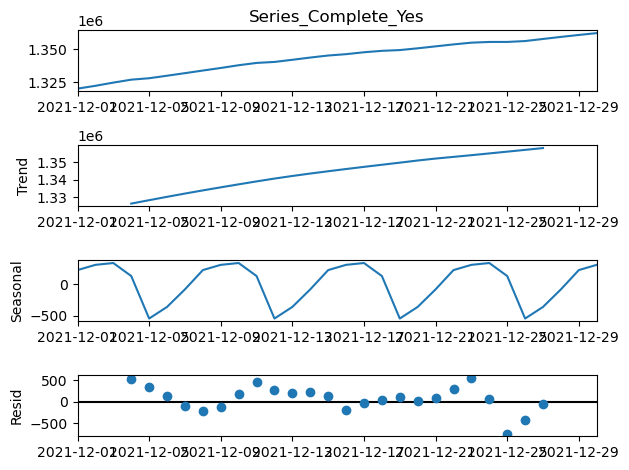

In [89]:
decomp = seasonal_decompose(New_York_df_mean["Series_Complete_Yes"])
decomp.plot();

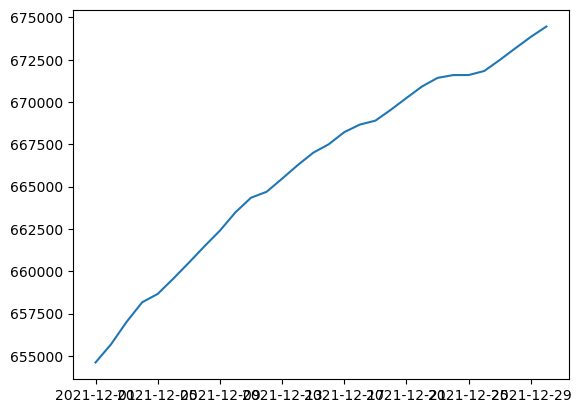

In [98]:
plt.plot(US_df_mean["Series_Complete_Yes"]);

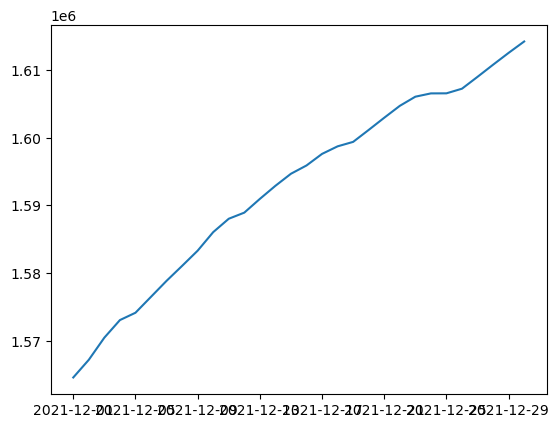

In [97]:
plt.plot(Texas_df_mean["Series_Complete_Yes"]);

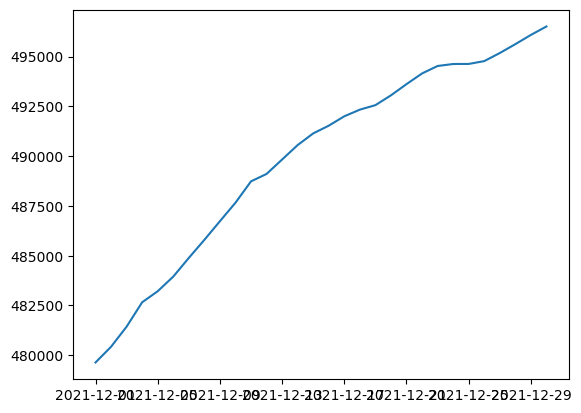

In [96]:
plt.plot(Massachusetts_df_mean["Series_Complete_Yes"]);

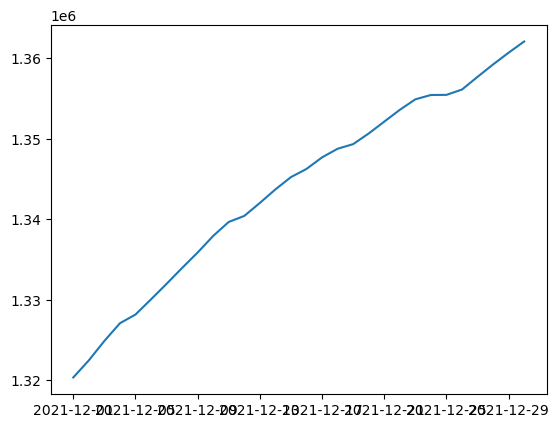

In [95]:
plt.plot(New_York_df_mean["Series_Complete_Yes"]);